In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
file_path = 'electricity.csv' 
data = pd.read_csv('electricity.csv')
print(data.head())

   Month  Day  Weekday  Consumption
0      1   15        3       320.54
1      5   20        6       412.76
2      8   10        2       210.89
3      3    5        4       315.36
4      6   25        0       457.23


Mean Squared Error: 10925.12
R-squared: -4.92


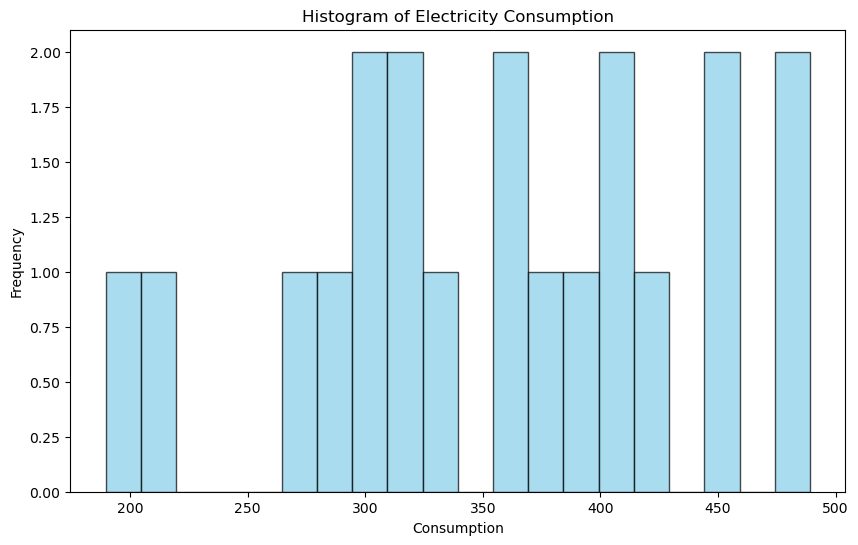

['electricity_consumption_model.pkl']

In [11]:
# Define features (X) and target (y)
X = data[['Month', 'Day', 'Weekday']]
y = data['Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(data['Consumption'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Electricity Consumption')
plt.show()

# Save the model if needed
import joblib
joblib.dump(model, 'electricity_consumption_model.pkl')
